## TP4
Para las imágenes suministradas
1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen
3. Comparar los histogramas

In [39]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

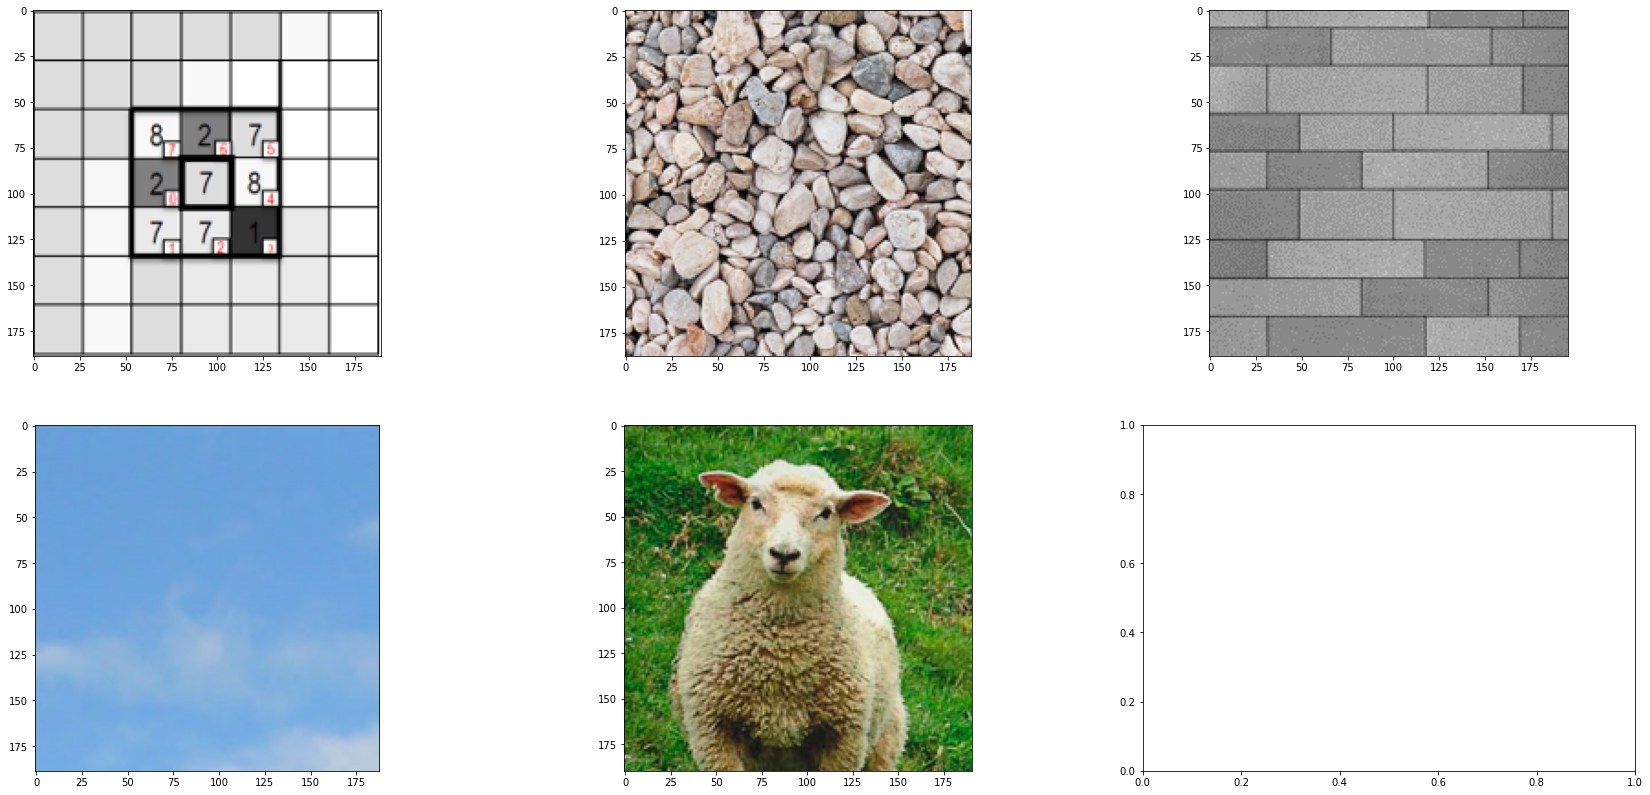

In [40]:
img1 = cv.imread('Imagen1.png')
img2 = cv.imread('Imagen2.png')
img3 = cv.imread('Imagen3.png')
img4 = cv.imread('Imagen4.png')
img5 = cv.imread('Imagen5.png')

img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img3_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
img4_gray = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

fig, axs = plt.subplots(2, 3,figsize=(30,14))
plt.subplot(2,3,1); plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.subplot(2,3,2); plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.subplot(2,3,3); plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.subplot(2,3,4); plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
plt.subplot(2,3,5); plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))

plt.show()

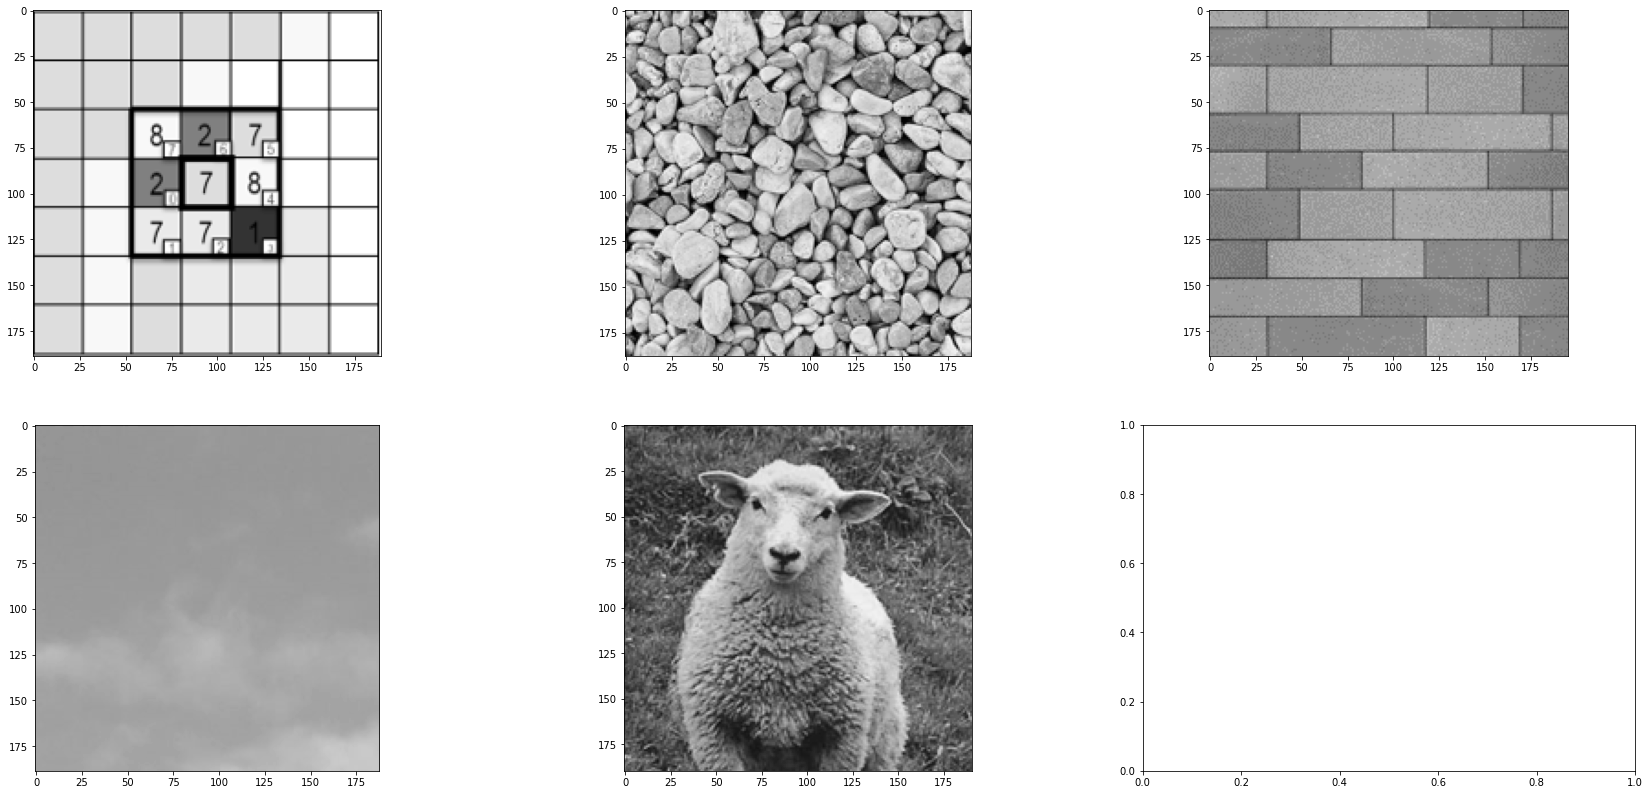

In [41]:
fig, axs = plt.subplots(2, 3,figsize=(30,14))
plt.subplot(2,3,1); plt.imshow(img1_gray, cmap = 'gray', vmin=0, vmax=255)
plt.subplot(2,3,2); plt.imshow(img2_gray, cmap = 'gray', vmin=0, vmax=255)
plt.subplot(2,3,3); plt.imshow(img3_gray, cmap = 'gray', vmin=0, vmax=255)
plt.subplot(2,3,4); plt.imshow(img4_gray, cmap = 'gray', vmin=0, vmax=255)
plt.subplot(2,3,5); plt.imshow(img5_gray, cmap = 'gray', vmin=0, vmax=255)

In [42]:
def lbp(img):
    img_out = np.zeros(img[:-2, :-2].shape)
    
    for x in np.arange(1, img.shape[0]-1):
        for y in np.arange(1, img.shape[1]-1):
            gc = img[x, y]
            gp1 = img[x-1, y] >= gc
            gp2 = img[x-1, y+1] >= gc
            gp3 = img[x, y+1] >= gc
            gp4 = img[x+1, y+1] >= gc
            gp5 = img[x+1, y] >= gc
            gp6 = img[x+1, y-1] >= gc
            gp7 = img[x, y-1] >= gc
            gp8 = img[x-1, y-1] >= gc

            img_out[x-1, y-1] = np.sum(2**np.array([0, 1, 2, 3, 4, 5, 6, 7]) * np.array([gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8]))

    return img_out
    

In [43]:
lbp_imgs = []
for img in np.array([img1_gray, img2_gray, img3_gray, img4_gray, img5_gray]):
    lbp_imgs.append(lbp(img))

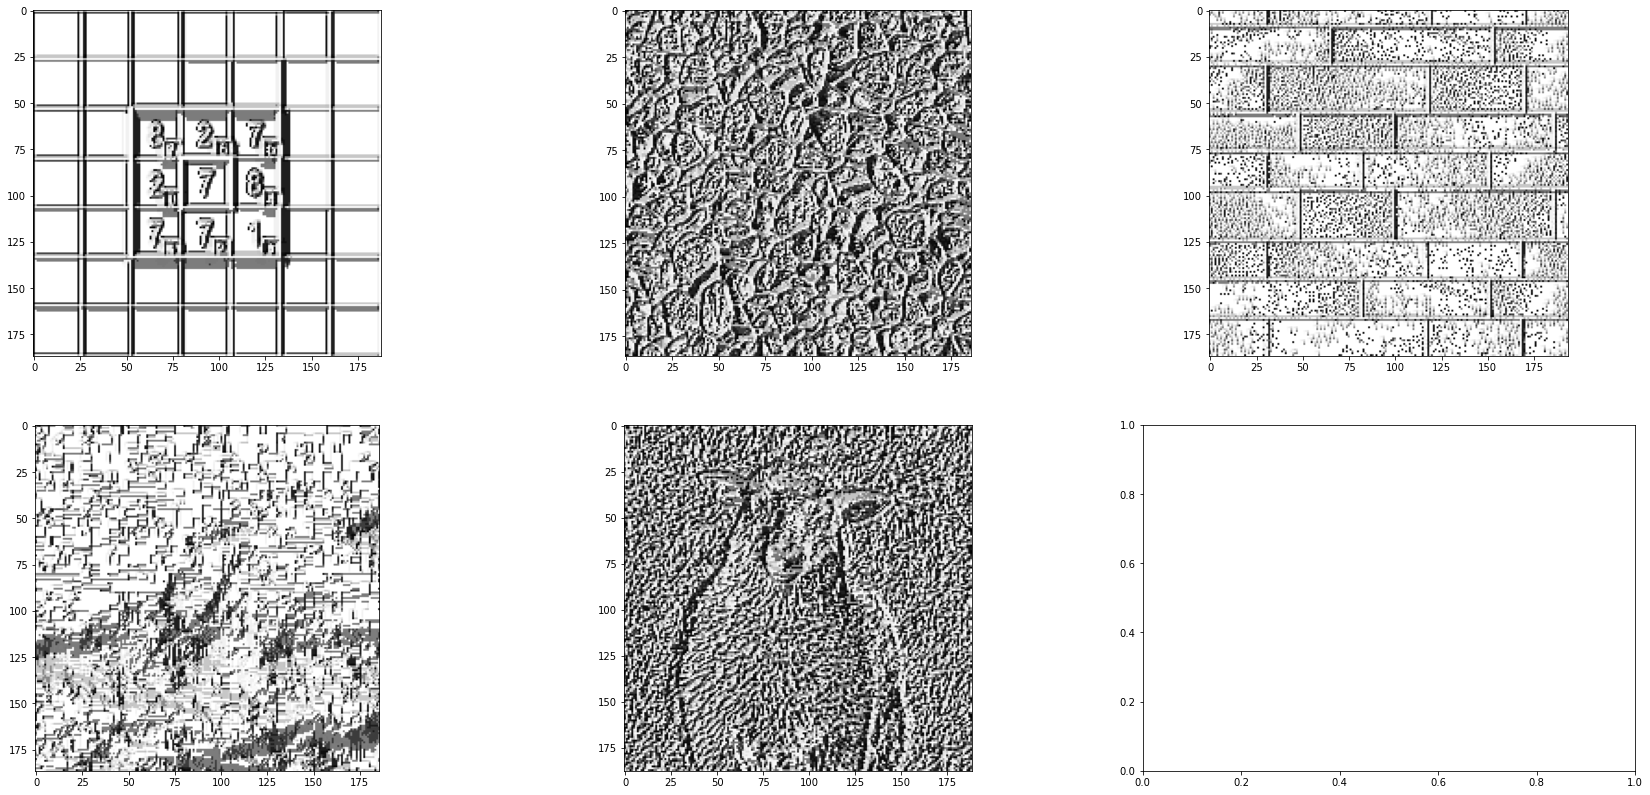

In [44]:
fig, axs = plt.subplots(2, 3,figsize=(30,14))

for i,img in enumerate(lbp_imgs):
    plt.subplot(2,3,i+1); plt.imshow(img, cmap = 'gray', vmin=0, vmax=255)


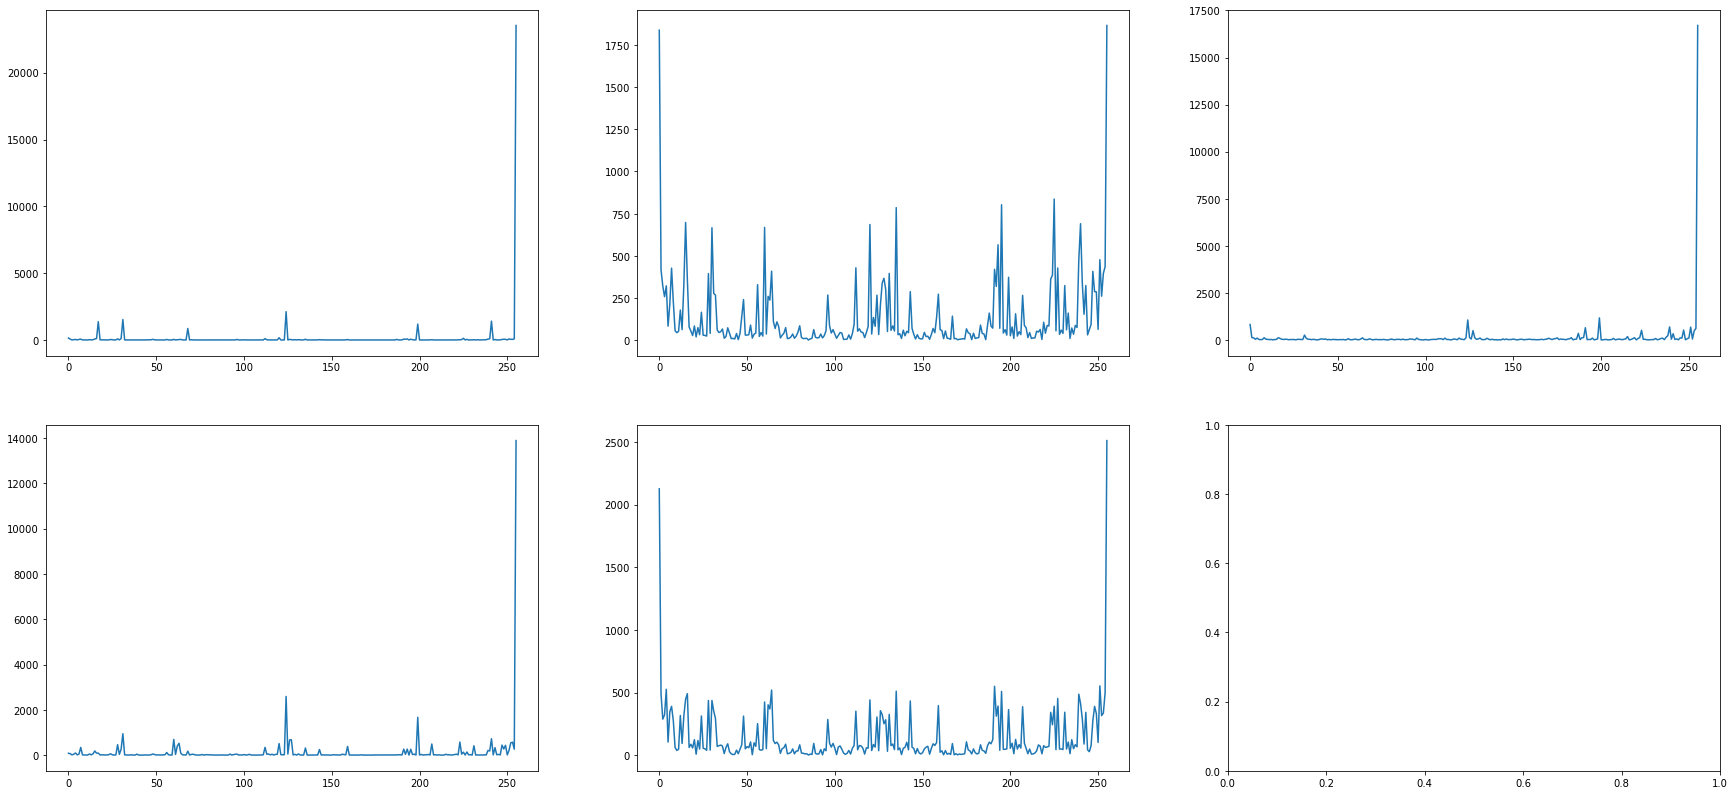

In [45]:

fig, axs = plt.subplots(2, 3,figsize=(30,14))

for i,img in enumerate(lbp_imgs):
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    plt.subplot(2,3,i+1); plt.plot(hist)
